In [1]:
#import des bibliothèques

import requests
from bs4 import BeautifulSoup
import pandas as pd
import re

"""
Les expressions régulières
sontun petit langage de programmation<
spécialisé embarqué dans Python et dont la manipulation est rendue 
possible par l'utilisation du module re. En utilisant ce petit langage, 
on définit des règles pour spécifier une correspondance 
avec un ensemble souhaité de chaînes de caractères.
"""

"\nLes expressions régulières\nsontun petit langage de programmation<\nspécialisé embarqué dans Python et dont la manipulation est rendue \npossible par l'utilisation du module re. En utilisant ce petit langage, \non définit des règles pour spécifier une correspondance \navec un ensemble souhaité de chaînes de caractères.\n"

In [2]:
#requête sur URL via HTTP retourne la page de l'url 

url='https://www.tripadvisor.fr/Attraction_Products-g189413-zfg12131-Crete.html/'
headers = {'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/80.0.3987.132 Safari/537.36'}
r=requests.get(url,headers=headers)
Page_activites = BeautifulSoup(r.content,'html.parser')

In [3]:
#définition d'une fonction get_result qui me retourne si l'élément existe, le premier élement 
#pour parer aux différents écarts d'informations entre les activités

def get_result(elements):
    if elements:
        return elements[0]

# <font color=red>I/ Boucle 1ere page et création de ma dataframe</font>

In [1]:
#pour récupérer les éléments même ceux qui n'existent pas

df_columns = ["title", "url", "reviews", "rating", "price", "duration", "description"]
df = pd.DataFrame(columns=df_columns)

for activity in Page_activites.select("div.listing_details"):#manière css de récupérer l'information
    
    activity_title = get_result(
        [i.text for i in activity.select("div.listing_title")] 
    )
    
    activity_url = get_result(
        ["www.tripadvisor.fr" + i.a["href"] for i in activity.select("div.listing_title")]
    )
    
    activity_rating = get_result(
        [int(i['class'][1].strip('bubble_'))/10 for i in activity.select("span[class*=ui_bubble_rating]")] #Manière de récupérer les bubble
    ) #strip supprime les caractères de gauche et de droite que l'on lui specifie
    
    activity_reviews = get_result(
        [i.text for i in activity.select("div.listing_rating")]
    )
    activity_price = get_result(
        [i.text.replace(',', '.') for i in activity.select("div.from > span")] # selectionne tous les span qui sont sous from
    )
    
    activity_duration = get_result(
        [i.text.replace('1-2','0.5').strip()for i in activity.select("div.product_duration")]
    )
    activity_description = get_result(
        [i.text for i in activity.select("div.listing_description")]
    )
    
    df = df.append(
        {
            "title": activity_title,
            "url": activity_url,
            "rating": activity_rating,
            "reviews": activity_reviews,
            "price": activity_price,
            "duration": activity_duration,
            "description": activity_description
        },
        ignore_index=True
    )  

IndentationError: unexpected indent (<ipython-input-1-ed118eae6043>, line 6)

In [5]:
df.head()

,title,url,reviews,rating,price,duration,description
0,Découverte de la véritable cuisine crétoise,www.tripadvisor.fr/AttractionProductReview-g18...,56 avis,5.0,81.03€,None,Visitez la maison de montagne familiale d'un c...
1,Zeus Cave-Traditional-Villages-Old Wind Mills-...,www.tripadvisor.fr/AttractionProductReview-g18...,103 avis,5.0,87.18€,None,Passez une journée entière à explorer la Crète...
2,Billet coupe-file: billet d'entrée au musée ar...,www.tripadvisor.fr/AttractionProductReview-g18...,11 avis,4.5,9.50€,3 heures,Le musée archéologique d'Héraklion abrite la p...
3,Visite contée des rues de La Canée en matinée ...,www.tripadvisor.fr/AttractionProductReview-g55...,85 avis,5.0,80.64€,4 heures,Découvrez la véritable Crète lors d'une visite...
4,Excursion d’une journée dans l’ouest de la Crè...,www.tripadvisor.fr/AttractionProductReview-g18...,39 avis,4.0,57.95€,None,"Les villes de La Canée et de Rethymnon, située..."


In [6]:
df= df.set_index('title')

# <font color=red>II/ Cleaning Dataframe</font>

In [7]:
df["price"]=df['price'].str.replace('€','')
df["reviews"]=df['reviews'].str.replace('avis','')
df["duration"]=df['duration'].str.replace('heures','')
df["duration"]=df['duration'].str.replace('heure','')

In [8]:
df

,url,reviews,rating,price,duration,description
title,,,,,,
Découverte de la véritable cuisine crétoise,www.tripadvisor.fr/AttractionProductReview-g18...,56,5.0,81.03,None,Visitez la maison de montagne familiale d'un c...
Zeus Cave-Traditional-Villages-Old Wind Mills-Olive Oil Factory-Small...,www.tripadvisor.fr/AttractionProductReview-g18...,103,5.0,87.18,None,Passez une journée entière à explorer la Crète...
Billet coupe-file: billet d'entrée au musée archéologique d'Héraklion,www.tripadvisor.fr/AttractionProductReview-g18...,11,4.5,9.50,3,Le musée archéologique d'Héraklion abrite la p...
Visite contée des rues de La Canée en matinée avec dégustation de...,www.tripadvisor.fr/AttractionProductReview-g55...,85,5.0,80.64,4,Découvrez la véritable Crète lors d'une visite...
Excursion d’une journée dans l’ouest de la Crète : La Canée...,www.tripadvisor.fr/AttractionProductReview-g18...,39,4.0,57.95,None,"Les villes de La Canée et de Rethymnon, située..."
Snorkeling et excursion en bateau en Crète,www.tripadvisor.fr/AttractionProductReview-g18...,43,5.0,61.54,4,La plongée en apnée est à la fois très relaxan...
Randonnée d'une journée en petit groupe dans les Gorges de Samaria au...,www.tripadvisor.fr/AttractionProductReview-g18...,16,5.0,95.00,None,Promenez-vous dans l’un des plus longs canyons...
Crète excursion vin et huile d'olive,www.tripadvisor.fr/AttractionProductReview-g55...,46,5.0,85.14,None,Le sol riche et fertile de la Crète en fait un...
SUP et plongée en tuba au Blue Lagoon - Baie de Loutraki,www.tripadvisor.fr/AttractionProductReview-g55...,248,5.0,59.00,2,Explorez la côte crétoise à partir d'une planc...


In [9]:
#fonction qui convertit en float sauf quand y a nan
import numpy as np

def f(x):
    try:
        return np.float(x)
    except:
        return np.nan

In [10]:
#coversion type des colonnes

df['price']=df['price'].astype(float)
df["reviews"] =df["reviews"].apply(f)
df["duration"] =df["duration"].apply(f)


In [11]:
df.dtypes

url             object
reviews        float64
rating         float64
price          float64
duration       float64
description     object
dtype: object

# <font color=red>III/ Clustering + dataviz </font>

In [12]:
df.describe()

,reviews,rating,price,duration
count,24.000000,24.000000,27.000000,13.000000
mean,50.833333,4.645833,106.947407,2.346154
std,53.509582,0.800532,126.469172,1.419868
min,1.000000,2.000000,9.500000,0.500000
25%,19.000000,4.875000,48.975000,1.000000
50%,33.500000,5.000000,79.000000,2.000000
75%,61.750000,5.000000,88.425000,4.000000
max,248.000000,5.000000,520.000000,4.000000


In [13]:
df.isna().head()

,url,reviews,rating,price,duration,description
title,,,,,,
Découverte de la véritable cuisine crétoise,False,False,False,False,True,False
Zeus Cave-Traditional-Villages-Old Wind Mills-Olive Oil Factory-Small...,False,False,False,False,True,False
Billet coupe-file: billet d'entrée au musée archéologique d'Héraklion,False,False,False,False,False,False
Visite contée des rues de La Canée en matinée avec dégustation de...,False,False,False,False,False,False
Excursion d’une journée dans l’ouest de la Crète : La Canée...,False,False,False,False,True,False


In [14]:
df.isna().sum()

url             0
reviews         3
rating          3
price           0
duration       14
description     0
dtype: int64

In [15]:
#imputation des valeurs manquantes par la moyenne
pd.set_option("display.precision", 2)
df.fillna(df.mean(), inplace=True)
df

,url,reviews,rating,price,duration,description
title,,,,,,
Découverte de la véritable cuisine crétoise,www.tripadvisor.fr/AttractionProductReview-g18...,56.00,5.00,81.03,2.35,Visitez la maison de montagne familiale d'un c...
Zeus Cave-Traditional-Villages-Old Wind Mills-Olive Oil Factory-Small...,www.tripadvisor.fr/AttractionProductReview-g18...,103.00,5.00,87.18,2.35,Passez une journée entière à explorer la Crète...
Billet coupe-file: billet d'entrée au musée archéologique d'Héraklion,www.tripadvisor.fr/AttractionProductReview-g18...,11.00,4.50,9.50,3.00,Le musée archéologique d'Héraklion abrite la p...
Visite contée des rues de La Canée en matinée avec dégustation de...,www.tripadvisor.fr/AttractionProductReview-g55...,85.00,5.00,80.64,4.00,Découvrez la véritable Crète lors d'une visite...
Excursion d’une journée dans l’ouest de la Crète : La Canée...,www.tripadvisor.fr/AttractionProductReview-g18...,39.00,4.00,57.95,2.35,"Les villes de La Canée et de Rethymnon, située..."
Snorkeling et excursion en bateau en Crète,www.tripadvisor.fr/AttractionProductReview-g18...,43.00,5.00,61.54,4.00,La plongée en apnée est à la fois très relaxan...
Randonnée d'une journée en petit groupe dans les Gorges de Samaria au...,www.tripadvisor.fr/AttractionProductReview-g18...,16.00,5.00,95.00,2.35,Promenez-vous dans l’un des plus longs canyons...
Crète excursion vin et huile d'olive,www.tripadvisor.fr/AttractionProductReview-g55...,46.00,5.00,85.14,2.35,Le sol riche et fertile de la Crète en fait un...
SUP et plongée en tuba au Blue Lagoon - Baie de Loutraki,www.tripadvisor.fr/AttractionProductReview-g55...,248.00,5.00,59.00,2.00,Explorez la côte crétoise à partir d'une planc...


In [16]:
#savoir s'il y a encore des valeurs manquantes ou pas
print(df.isna().sum())

url            0
reviews        0
rating         0
price          0
duration       0
description    0
dtype: int64


In [17]:
df.corr()

,reviews,rating,price,duration
reviews,1.00,0.27,-0.11,-0.05
rating,0.27,1.00,-0.02,-0.10
price,-0.11,-0.02,1.00,0.29
duration,-0.05,-0.10,0.29,1.00


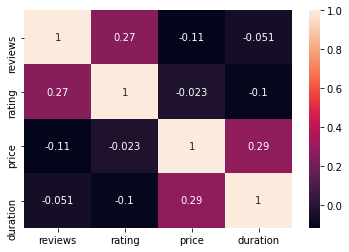

In [18]:
#visualisation des colonnes sous forme de matrice de correlation
#quelle data est corréelée avec qui

import seaborn as sea
import matplotlib.pyplot as plt
import pandas as pd

corrMatrix = df.corr()
sea.heatmap (corrMatrix, annot = True)
plt.show()

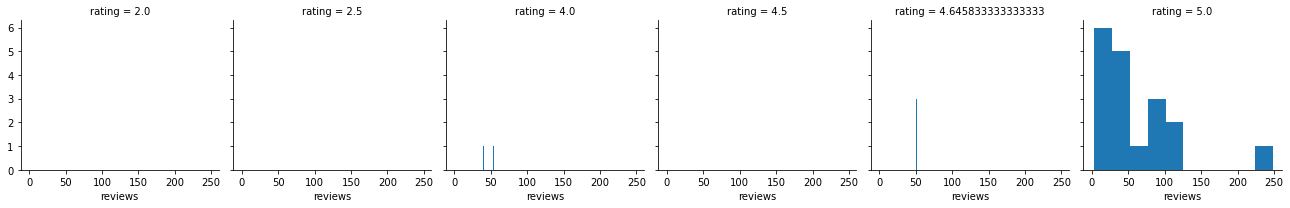

In [19]:
#représentation graphique des data les plus corrélées entre elles

g = sea.FacetGrid(df, col='rating')
g.map(plt.hist,'reviews', bins=10)

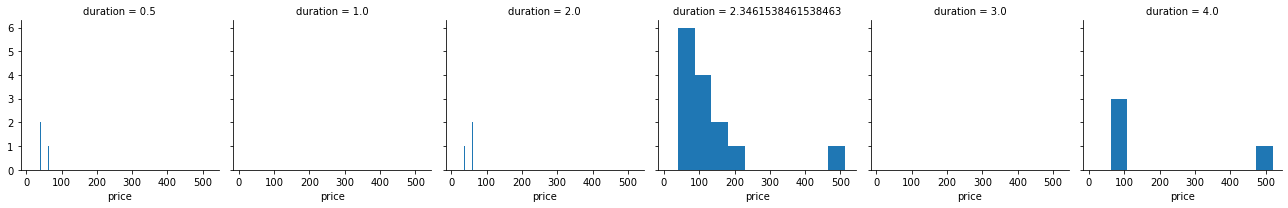

In [20]:
g = sea.FacetGrid(df, col='duration')
g.map(plt.hist,'price', bins=10)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27 entries, Découverte de la véritable cuisine crétoise to Escapades inexplorées: Safari côte à côte vers la péninsule de...
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   url          27 non-null     object 
 1   reviews      27 non-null     float64
 2   rating       27 non-null     float64
 3   price        27 non-null     float64
 4   duration     27 non-null     float64
 5   description  27 non-null     object 
dtypes: float64(4), object(2)
memory usage: 2.7+ KB


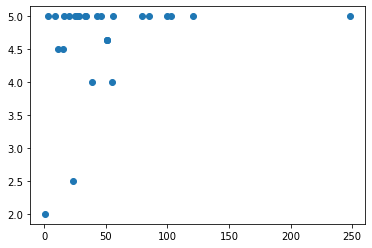

In [22]:
#nuage de points de rating par rapport aux reviews (test) 

plt.scatter(df['reviews'],df['rating'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D7FFDBFA48>,
      dtype=object)

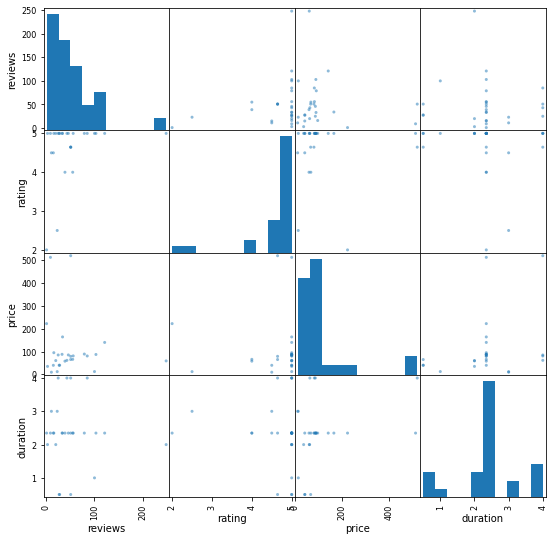

In [23]:
#graphique - croisement deux à deux des variables
from pandas.plotting import scatter_matrix
scatter_matrix(df,figsize=(9,9))

In [42]:
#creation de ma variable X pour le clustering en supprimant certaines colonnes

X = df.drop(['url', 'description'], axis=1)

In [45]:
# normalisation de ma dataframe avoir des données entre 0 et 1 
#Cela préserve la forme de la distribution de chaque variable 
#tout en les rendant facilement comparables sur la même “échelle”.
# et reduire la compléxité du modèle 

X_max = X.max()
XX = X.apply(lambda x: x / x.max())
print(X_max)

reviews     248.0
rating        5.0
price       520.0
duration      4.0
dtype: float64


In [46]:
from sklearn.cluster import KMeans

In [47]:
#Elbow Method pour detecter combien de clusters je vais devoir avoir besoin pour mon modèle

inertia =[]
K_range= range(1,20)
for k in K_range:
    model=KMeans(n_clusters=k).fit(X)
    inertia.append(model.inertia_)

Text(0, 0.5, 'Cout du modele(Inertia)')

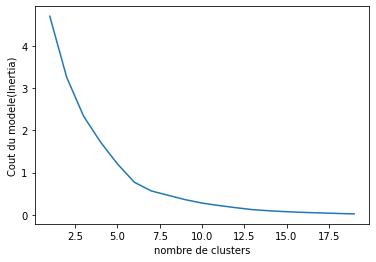

In [48]:
#visualisation

plt.plot(K_range,inertia)
plt.xlabel('nombre de clusters')
plt.ylabel('Cout du modele(Inertia)')

array([[0.18701464, 0.96273148, 0.15000427, 0.65491453],
       [0.12063172, 0.96458333, 0.99310577, 0.79326923],
       [1.        , 1.        , 0.11346154, 0.5       ],
       [0.20749328, 0.98229167, 0.07562981, 0.15625   ],
       [0.0483871 , 0.45      , 0.22538462, 0.66826923]])

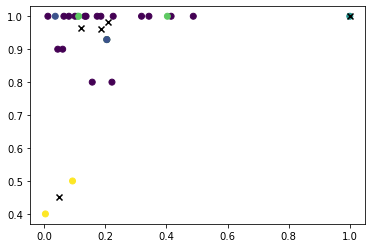

In [76]:
#création du modèle KMeans

model = KMeans(n_clusters=5) #choix du nombre de clusters selon la méthode ELBOW

model.fit(X) #fit entraine le modèle

clusters=model.predict(X) #Nous pouvons prédire la classe des nouvelles instances de données à l'aide de notre modèle 
#de classification finalisé dans scikit-learn en utilisant la fonction prédire () .

ax = plt.scatter(X.iloc[:,0],X.iloc[:,1],c=model.predict(X))
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],marker = "x",color = 'black')

model.cluster_centers_#ressort les K (données prototypes, autour desquelles peuvent 
#être regroupées les autres données, ou autrement dit les centroides). 
#l'algo associe chaque donnée à son centroide le plus proche, pour créer des clusters.

#model.inertia_
               

#n_init = nombre d'executions(10)
#max_iter = nombre d'itérations(300)
#init = type d'initialisation,par défaut K-Means++


In [50]:
X_clustered = pd.DataFrame(model.cluster_centers_,columns=X.columns) #Mise sous forme de dataset mes centroides

In [54]:
print(X_max)
X_clustered['reviews']=X_clustered['reviews']*X_max['reviews']
X_clustered['rating']=X_clustered['rating']*X_max['rating']
X_clustered['price']=X_clustered['price']*X_max['price']
X_clustered['duration']=X_clustered['duration']*X_max['duration']
X_clustered.head()

reviews     248.0
rating        5.0
price       520.0
duration      4.0
dtype: float64


,reviews,rating,price,duration
0,12.00,2.25,117.20,2.67
1,51.46,4.91,39.33,0.62
2,46.38,4.81,78.00,2.62
3,29.92,4.82,516.42,3.17
4,248.00,5.00,59.00,2.00


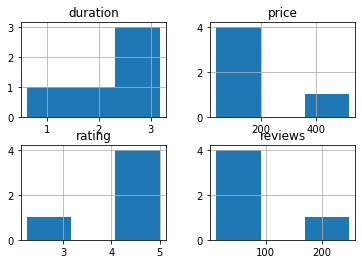

In [86]:
hist = X_clustered.hist(bins=3)#visualisation histogramme

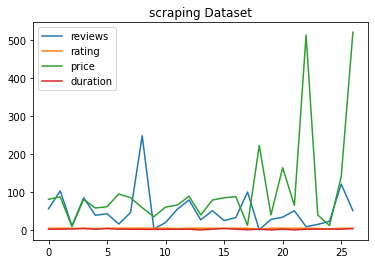

In [72]:
# get columns to plot
columns = X
# create x data
x_data = range(0, df.shape[0])
# create figure and axis
fig, ax = plt.subplots()
# plot each column
for column in columns:
    ax.plot(x_data, df[column], label=column)
# set title and legend
ax.set_title('scraping Dataset')
ax.legend()

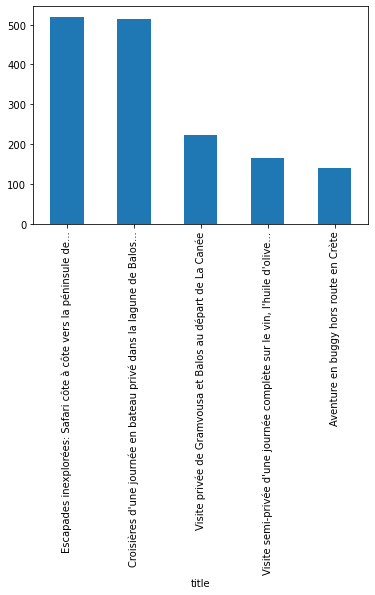

In [81]:
df.groupby("title").price.mean().sort_values(ascending=False)[:5].plot.bar()

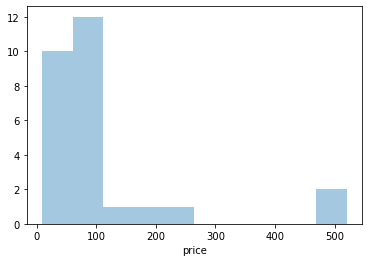

In [84]:
sea.distplot(df['price'], bins=10, kde=False)